Please upload an image:


Saving subpixel-opencv-demo.jpg to subpixel-opencv-demo.jpg


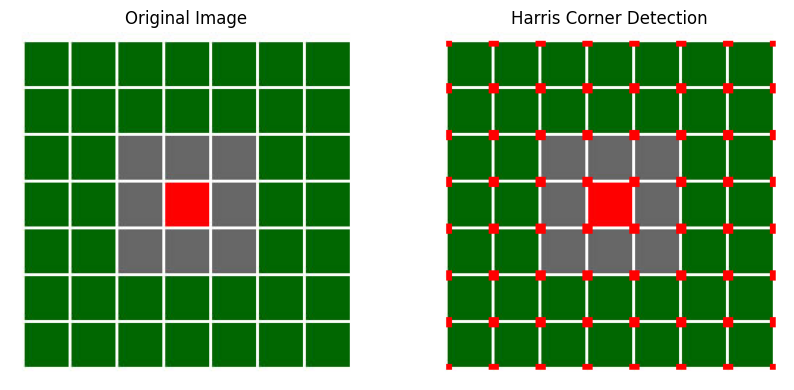

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Step 1: Upload an image
print("Please upload an image:")
uploaded = files.upload()

# Extract the image file name
image_filename = list(uploaded.keys())[0]

# Step 2: Read and process the image
# Open the uploaded image
image = Image.open(BytesIO(uploaded[image_filename]))
image = np.array(image)

# Convert to grayscale
if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
else:
    gray_image = image

# Step 3: Apply Harris Corner Detection
gray_float = np.float32(gray_image)
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate to mark corners
dst = cv2.dilate(dst, None)

# Threshold to identify strong corners
threshold = 0.01 * dst.max()
image_with_corners = image.copy()

if len(image.shape) == 3:
    # Mark corners in red for colored images
    image_with_corners[dst > threshold] = [255, 0, 0]
else:
    # Highlight corners in grayscale images
    image_with_corners[dst > threshold] = 255

# Step 4: Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)

# Image with Harris Corners
plt.subplot(1, 2, 2)
plt.title("Harris Corner Detection")
plt.axis("off")
plt.imshow(image_with_corners, cmap='gray' if len(image.shape) == 2 else None)

plt.show()
